# Clustering Challenge
Clustering is an unsupervised machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (A, B, and C) into clusters. Run the cell below to load the data.

**Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('clusters.csv')
df.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Perfroming **Exploratory Data Analysis** on the given data

In [3]:
df.shape

(1000, 3)

In [4]:
df.isnull().sum()

A    0
B    0
C    0
dtype: int64

In [5]:
df.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


Using **PCA** to visulaise the given data in a **2-D** Space

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features = MinMaxScaler().fit_transform(df[df.columns])
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

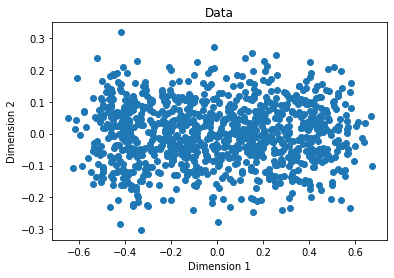

In [7]:
plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Using **WCSS** to calculate in how many clusters the data is divided

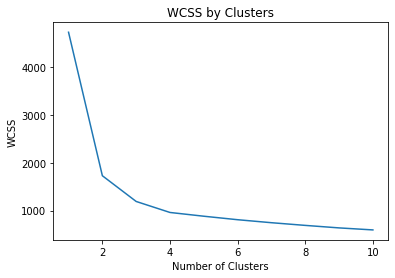

In [8]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Here we observe that the plot gets flattened after 4, hence we will take the number of clusters to be **4** 

**Using K-Means for model prediction**

In [10]:
kmean_model = KMeans(n_clusters=4, init='k-means++', n_init=500, max_iter=1500 )
kmean_clusters = kmean_model.fit_predict(df)

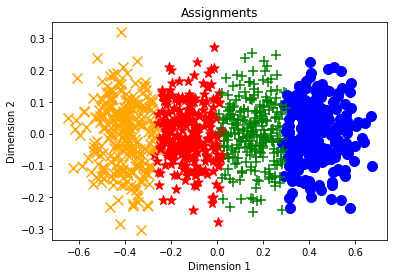

In [13]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'orange', 2:'red', 3:'green'}
    mrk_dic = {0:'o', 1:'x', 2:'*', 3:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker = markers[sample], s=100)
        
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()
    
plot_clusters(features_2d, kmean_clusters)

**Using Agglomerative Clustering for model prediction**

In [16]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(df)

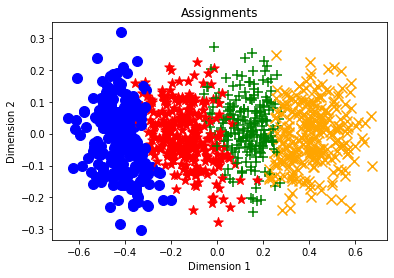

In [17]:
plot_clusters(features_2d, agg_clusters)

#### We have succesfully separted the given data into 4 distinct clusters using both K-Means Algorithm and Agglomerative Clustering